In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte

%matplotlib inline

In [2]:
#constants
m_e = 9.109*(10**-28)
q = 4.803*(10**-10)
h=6.626*(10**-27)
c = 2.99 * (10**10)
k = 1.381 * (10**-16)
m_h = 1.67 * (10**-27) *1000

In [3]:
#function for finding mu_n
def frequency_cutoff(n):

    return (2 * (np.pi**2) * m_e * (q**4)) / ((h**3) * (n**2))

In [4]:
#function for finding cross section
def cross_section_n(v,n,T):
    exp_x = -(2 * (1 - (1/(n**2))) * (np.pi**2) * m_e * (q**4)) / ((h**2) * k * T)
    return (64 * (np.pi**4) * m_e * (q**10) * np.exp(exp_x)  )/ (3 * np.sqrt(3) * (h**6) * (v**3) * (n**3) * c) 

9.869604401089358

9.869604401089358

In [5]:
def cross_section(v,T):
    sig = 0
    for n in range(1,21):
        if v > frequency_cutoff(n):
            sig += cross_section_n(v,n,T)
    return sig

Text(0.5, 1.0, 'Frequency vs Ionazation Crosssection')

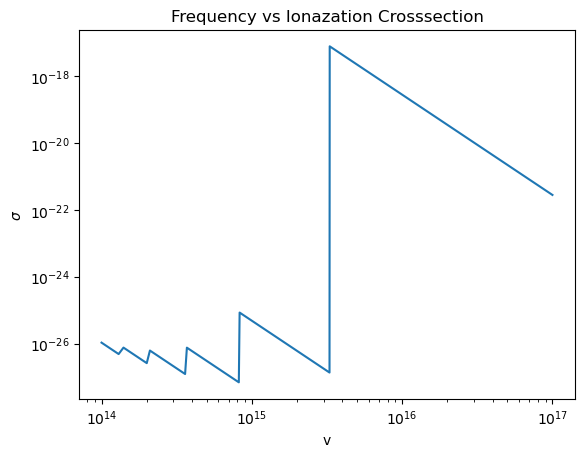

In [6]:
x = np.linspace(10**14,10**17,10**4)
y = []
    
for i in range(len(x)):
    y.append(cross_section(x[i],5800))

plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\sigma$')

plt.xlabel('v')
plt.title('Frequency vs Ionazation Crosssection')

In [277]:
def kappa(sig):

    return sig/m_h


In [278]:
def black_body(v,T):
    return 2 * h * (v**3) / ((c**2)*(np.exp(h*v/(k*T))-1))
    

NameError: name 'v' is not defined

In [311]:
def top_integrand(v,T):
    return black_body(v,T)/kappa(cross_section(v,T))

In [320]:
x = np.power(10,np.linspace(0,16,10**5))
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = black_body(x[i],5800)
    if i%10000 == 0:
        print(i)



0
10000
20000
30000
40000
50000
60000
70000
80000
90000


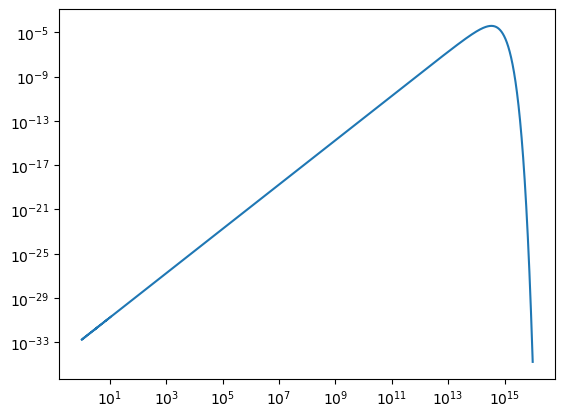

In [321]:
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')


1.3293774343580563e-25

In [325]:
inverse_kappa = inte.quad(top_integrand,10**13,10**16,limit=10**5, args=5800)[0]/inte.quad(black_body,1,10**16,args=5800)[0]

In [327]:
kappa = 1 / inverse_kappa 
print(kappa)

0.0015031518675747322
